# Random Forest - Classification

## Import ve Data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("penguins.csv")
df = df.dropna()
df = df[df["sex"] != "."]
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


---
## Train Test Split

### drop_first=True

In [28]:
X = pd.get_dummies(df.drop("species", axis=1))

In [29]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [30]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)

In [31]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [32]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=9)

---
## Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
#help(RandomForestClassifier)

In [36]:
model = RandomForestClassifier(n_estimators=9,
 max_features="sqrt", random_state=9)
## sqrt eski versiyolarındaki "auto"'ya tekabül ediyor.

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=9)

In [38]:
pengu_pred = model.predict(X_test)

---
## Değerlendirme Metrikleri

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [40]:
confusion_matrix(y_test,pengu_pred)

array([[44,  1,  1],
       [ 1, 22,  0],
       [ 1,  0, 30]], dtype=int64)

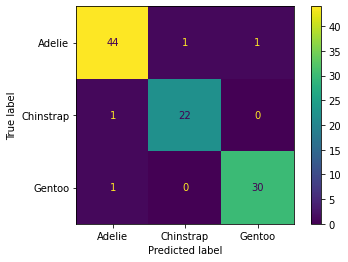

In [41]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [56]:
print(classification_report(y_test, pengu_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96        46
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       0.97      0.97      0.97        31

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



### .feature_imoprtances_

In [42]:
model.feature_importances_

array([0.40410856, 0.03960461, 0.14964551, 0.20052233, 0.16789954,
       0.0315447 , 0.00667476])

## İdeal Ağaç Sayısını Bulmak

In [54]:
hata = []

for n in range(1,30):
    model = RandomForestClassifier(n_estimators=n,max_features='auto', random_state=9)
    model.fit(X_train,y_train)
    deneme_pred = model.predict(X_test)
    hata.append(1-accuracy_score(deneme_pred,y_test))
 

c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

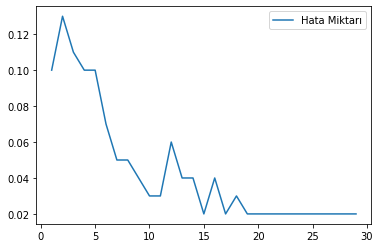

In [55]:
plt.plot(range(1,30), hata, label="Hata Miktarı")
plt.legend()

In [57]:
model = RandomForestClassifier(n_estimators=10,max_features='auto', random_state=9)
model.fit(X_train,y_train)
final = model.predict(X_test)

c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


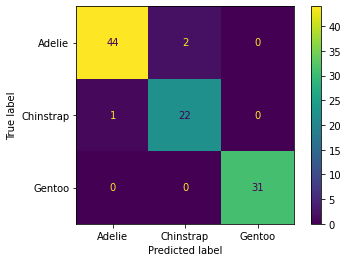

In [58]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [59]:
print(classification_report(y_test, final))

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        46
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



# **https://www.youtube.com/watch?v=6x4ZwnHHMSk**